In [2]:
#import the required packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [3]:
#Load the Dataset
data = pd.read_csv("/content/50_Startups.csv")

In [4]:
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [5]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
data.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [7]:
data.mean()

<ipython-input-7-abc01cf6c622>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.mean()


R&D Spend           73721.6156
Administration     121344.6396
Marketing Spend    211025.0978
Profit             112012.6392
dtype: float64

In [8]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [10]:
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [11]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [12]:
data.max()

R&D Spend           165349.2
Administration     182645.56
Marketing Spend     471784.1
State               New York
Profit             192261.83
dtype: object

In [13]:
data.min()

R&D Spend                 0.0
Administration       51283.14
Marketing Spend           0.0
State              California
Profit                14681.4
dtype: object

In [14]:
data.std()

<ipython-input-14-a47ac8255c06>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.std()


R&D Spend           45902.256482
Administration      28017.802755
Marketing Spend    122290.310726
Profit              40306.180338
dtype: float64

In [16]:
data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [19]:
data.info

<bound method DataFrame.info of     R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida

In [20]:
data_1=data.rename({'R&D Spend':'RD','Marketing Spend':'MS','Administration':'Admin'},axis=1)

In [21]:
data_1[data_1.duplicated()]

,RD,Admin,MS,State,Profit


In [22]:
data_1.corr()

<ipython-input-22-fa940e6684e6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_1.corr()


,RD,Admin,MS,Profit
RD,1.000000,0.241955,0.724248,0.972900
Admin,0.241955,1.000000,-0.032154,0.200717
MS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


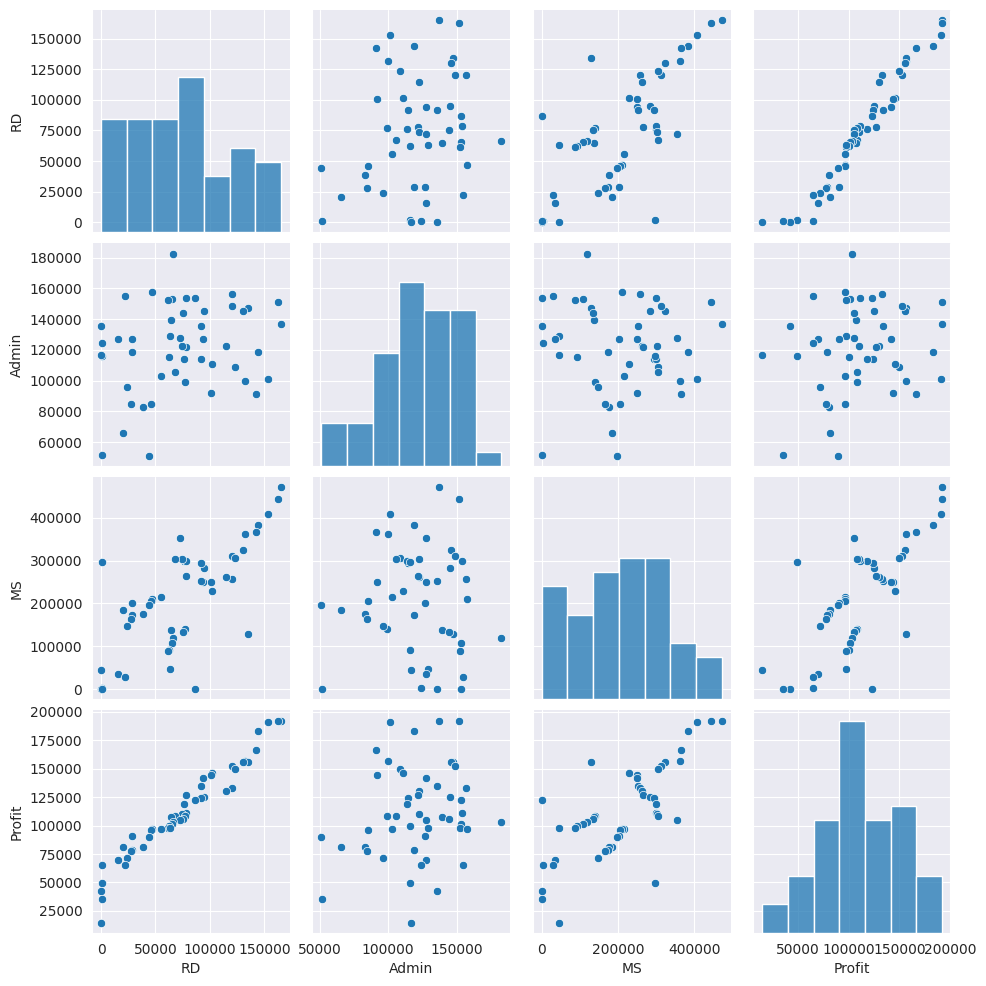

In [23]:
sns.set_style(style='darkgrid')
sns.pairplot(data_1)

In [26]:
import statsmodels.formula.api as smf
model = smf.ols('Profit~RD+MS+Admin',data=data_1).fit()

In [27]:
model.params

Intercept    50122.192990
RD               0.805715
MS               0.027228
Admin           -0.026816
dtype: float64

In [28]:
print(model.tvalues, '\n', np.round(model.pvalues,5))

Intercept     7.626218
RD           17.846374
MS            1.655077
Admin        -0.525507
dtype: float64 
 Intercept    0.00000
RD           0.00000
MS           0.10472
Admin        0.60176
dtype: float64


In [29]:
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [31]:
ml_ms = smf.ols('Profit~MS',data=data_1).fit()
print(ml_ms.tvalues,'\n',ml_ms.pvalues)

Intercept    7.808356
MS           7.802657
dtype: float64 
 Intercept    4.294735e-10
MS           4.381073e-10
dtype: float64


In [32]:
ml_Admin=smf.ols('Profit~Admin',data = data_1).fit()
print(ml_Admin.tvalues, '\n', ml_Admin.pvalues)

Intercept    3.040044
Admin        1.419493
dtype: float64 
 Intercept    0.003824
Admin        0.162217
dtype: float64


In [33]:
ml_CA=smf.ols('Profit~MS+Admin',data = data_1).fit()
print(ml_CA.tvalues, '\n', ml_CA.pvalues)

Intercept    1.142741
MS           8.281039
Admin        2.467779
dtype: float64 
 Intercept    2.589341e-01
MS           9.727245e-11
Admin        1.729198e-02
dtype: float64


In [34]:
rsq_RD=smf.ols('RD~Admin+MS',data=data_1).fit().rsquared
vif_RD=1/(1-rsq_RD)

rsq_Admin=smf.ols('Admin~RD+MS',data=data_1).fit().rsquared
vif_Admin=1/(1-rsq_Admin)

rsq_MS=smf.ols('MS~RD+Admin',data=data_1).fit().rsquared
vif_MS=1/(1-rsq_MS)

# Putting the values in Dataframe format
d1={'Variables':['Rd','Admin','MS'],
    'Vif':[vif_RD,vif_Admin,vif_MS]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,Rd,2.468903
1,Admin,1.175091
2,MS,2.326773


In [37]:
import statsmodels.api as sm

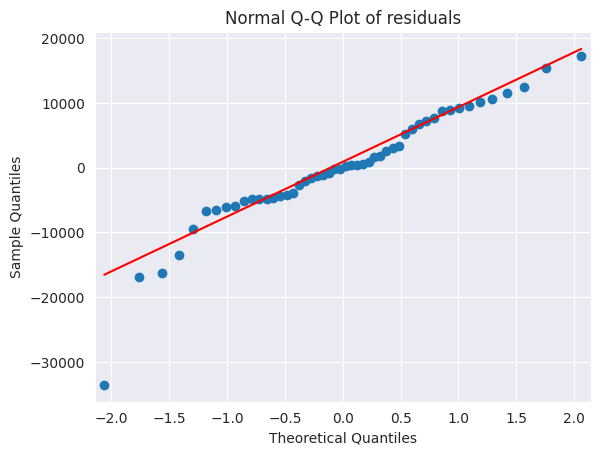

In [40]:
qqplot =sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q Plot of residuals")
plt.show()

In [41]:
list(np.where(model.resid>20000))

[array([], dtype=int64)]

In [45]:
list(np.where(model.resid<-20000))

[array([49])]

In [46]:
def get_standardized_values(vals):
  return (vals - vals.mean())/vals.std()

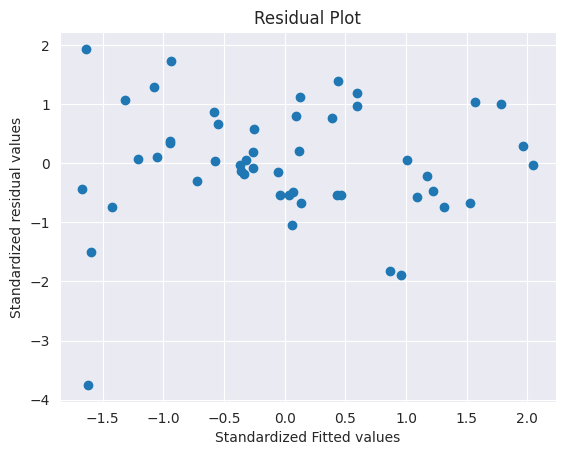

In [47]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [48]:
data_1.head(1)


,RD,Admin,MS,State,Profit
0,165349.2,136897.8,471784.1,New York,192261.83


eval_env: 1


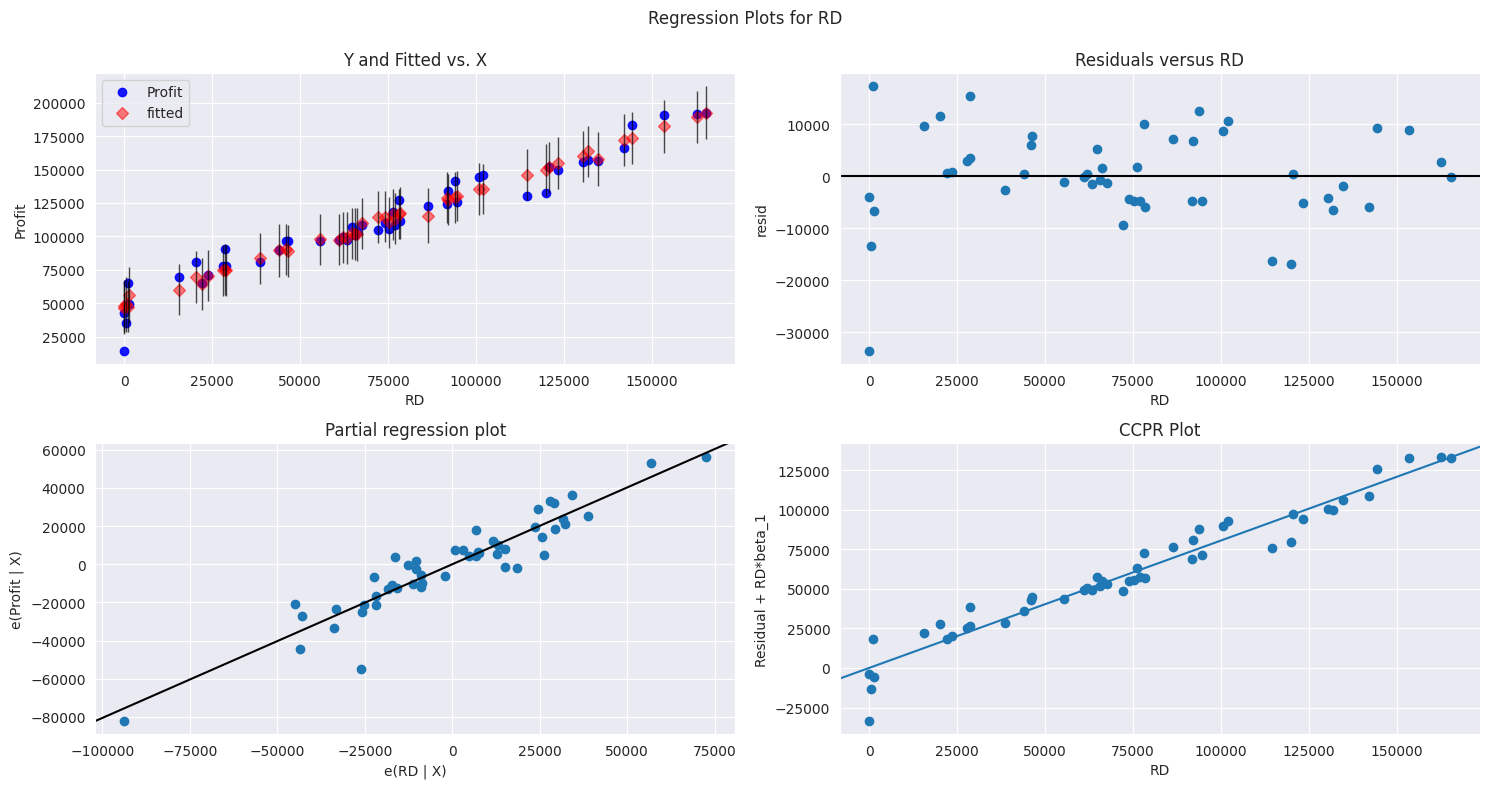

In [49]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RD", fig=fig)
plt.show()

eval_env: 1


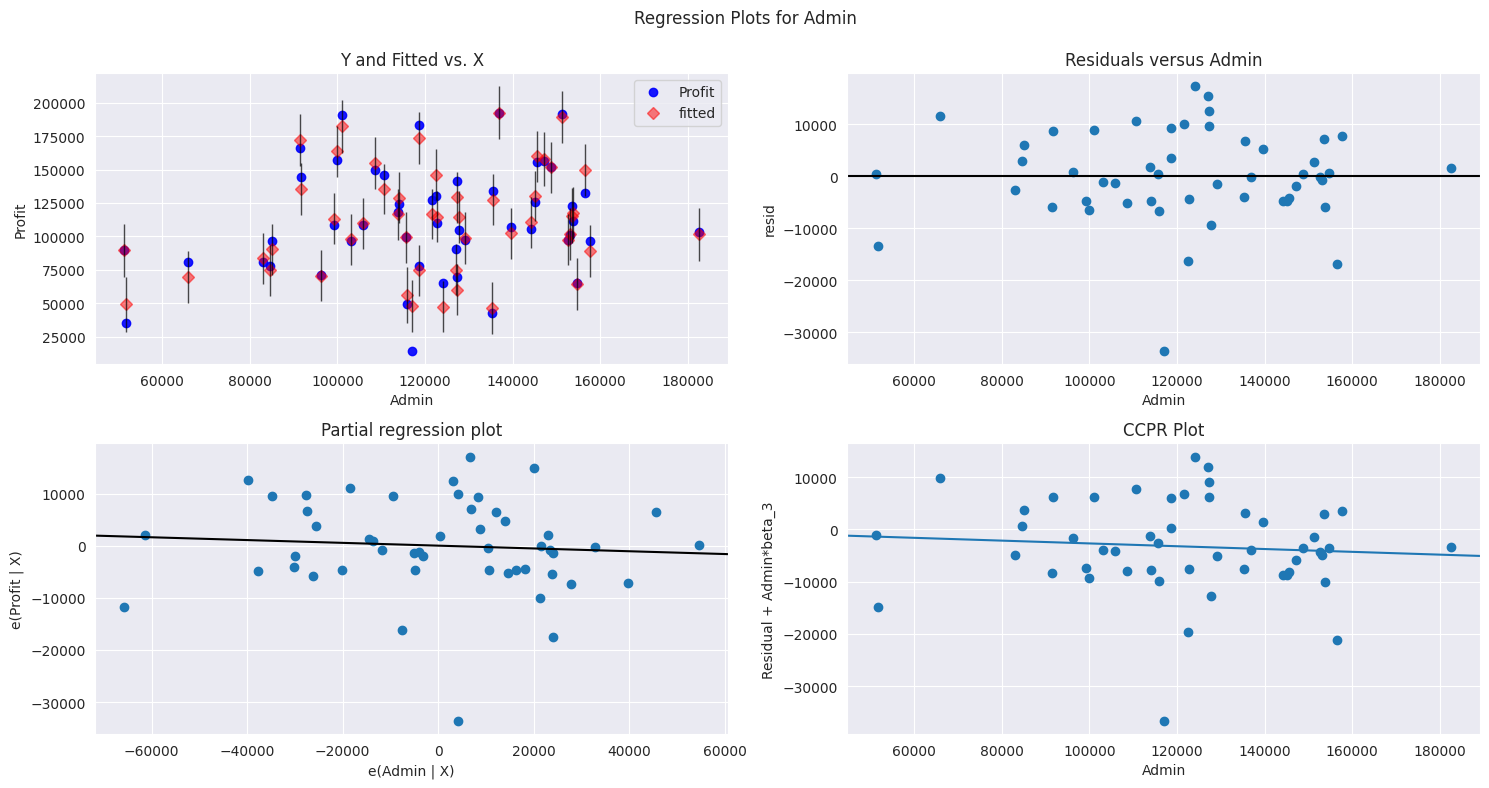

In [50]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Admin", fig=fig)
plt.show()

eval_env: 1


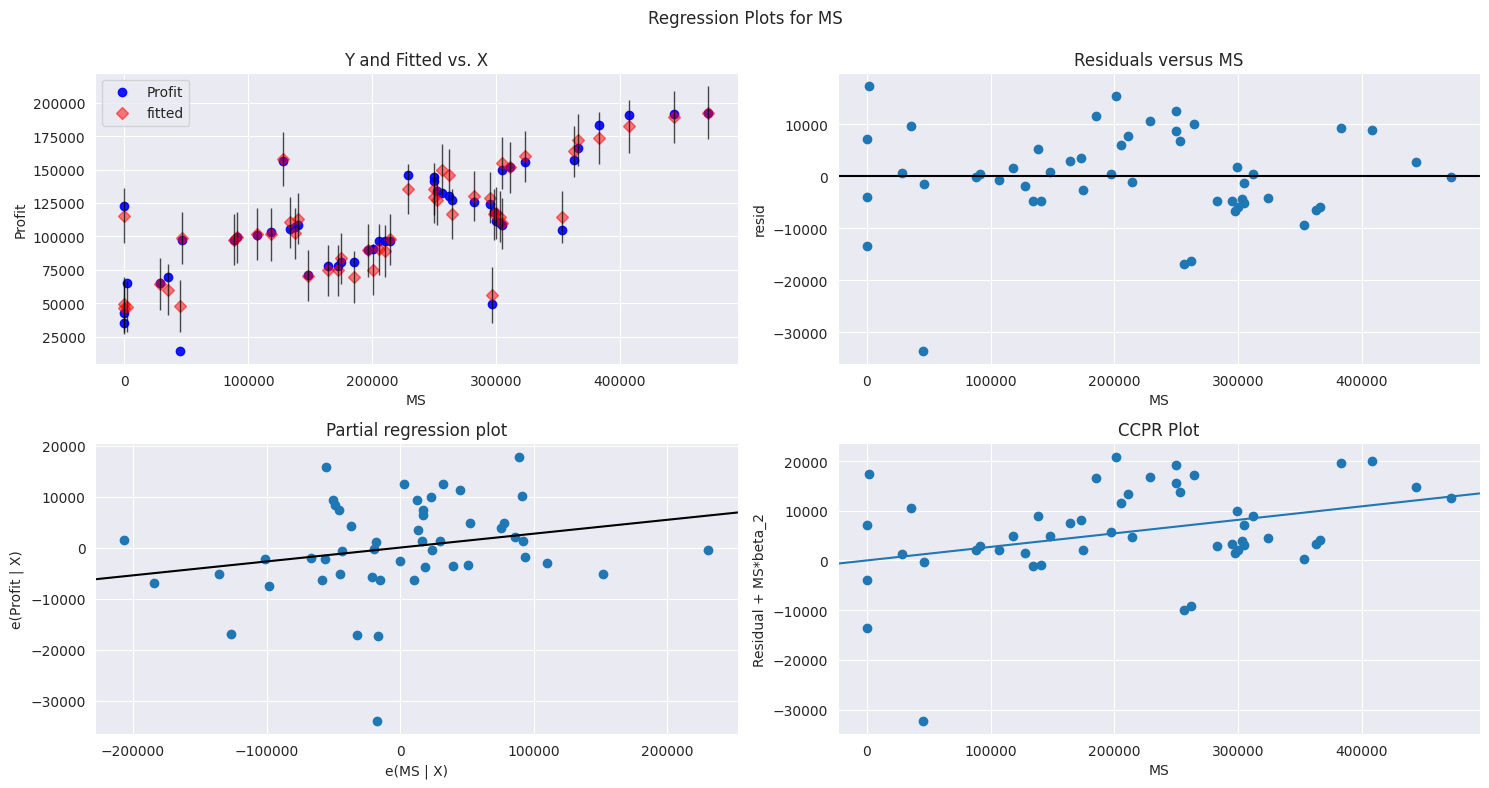

In [51]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "MS", fig=fig)
plt.show()

In [52]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

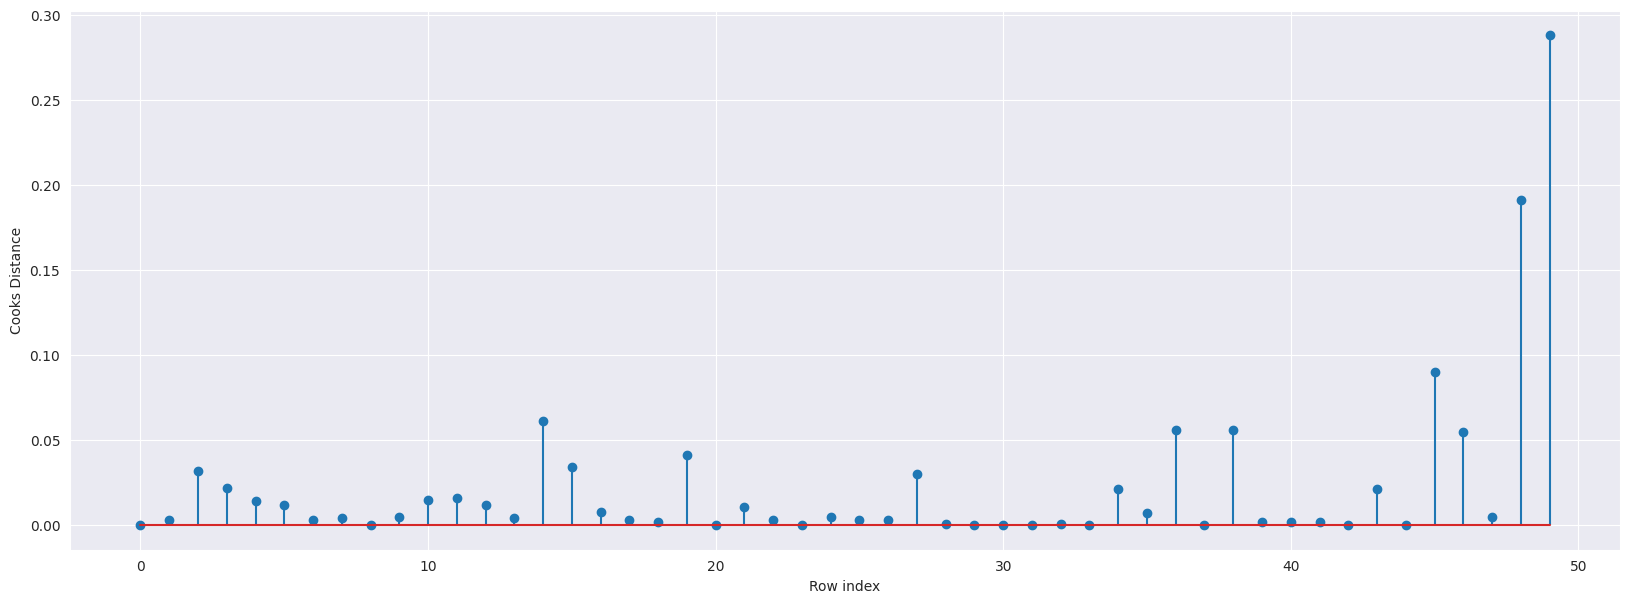

In [54]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data_1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [55]:
(np.argmax(c),np.max(c))

(49, 0.288082292754327)

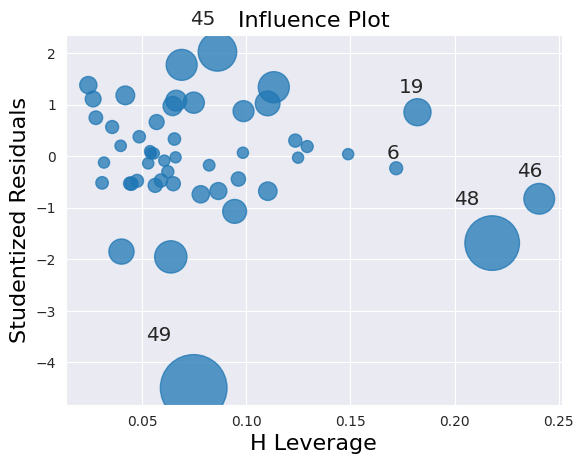

In [56]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [58]:
k = data_1.shape[1]
n = data_1.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [59]:
data_1[data_1.index.isin([49])]

,RD,Admin,MS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [60]:
data_new=data_1.copy()

In [61]:
data_2=data_new.drop(data_new.index[[49]],axis=0).reset_index()

In [62]:

data_2=data_2.drop(['index'],axis=1)

In [63]:
data_2

,RD,Admin,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [65]:
final_ml_MS = smf.ols('Profit~RD+MS',data=data_2).fit()

In [66]:
(final_ml_MS.rsquared,final_ml_MS.aic)

(0.9610856807456628, 1018.8564801588338)

In [68]:
final_ml_Ad = smf.ols('Profit~RD+Admin',data=data_2).fit()

In [69]:
(final_ml_Ad.rsquared,final_ml_Ad.aic)

(0.9584519070123048, 1022.0654576388338)

In [70]:

model_influence_MS = final_ml_MS.get_influence()
(c_MS, _) = model_influence_MS.cooks_distance

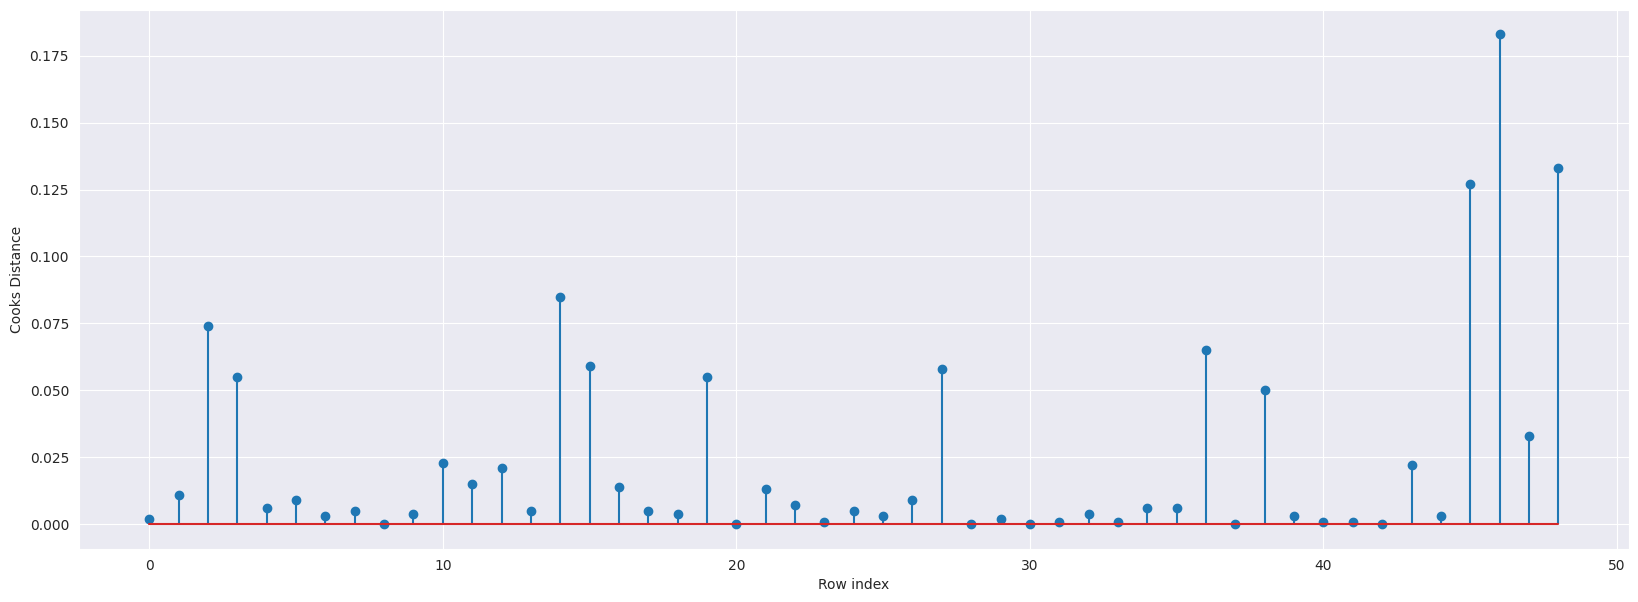

In [72]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data_2)),np.round(c_MS,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [73]:
final_ml_MS = smf.ols('Profit~RD+MS',data=data_2).fit()

In [74]:

(final_ml_MS.rsquared,final_ml_MS.aic)

(0.9610856807456628, 1018.8564801588338)

In [75]:
data_2.head()

,RD,Admin,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [76]:
new_data=pd.DataFrame({'RD':144372.41,"Admin":118671.85,"MS":383199.62},index=[1])

In [77]:

final_ml_MS.predict(new_data)

1    172246.416164
dtype: float64

In [79]:
pred_y = final_ml_MS.predict(data_2)

In [80]:
pred_y

0     190942.726927
1     188043.924520
2     179957.312472
3     172246.416164
4     170022.687457
5     161999.405410
6     157669.178690
7     159705.298181
8     151804.380605
9     153787.521922
10    135096.466868
11    134699.049858
12    129422.677987
13    128049.202655
14    149827.450777
15    145769.611357
16    117530.489091
17    130936.300519
18    129020.306206
19    116793.710748
20    117108.281313
21    118793.642939
22    115484.209637
23    110513.437292
24    113382.099441
25    103711.697086
26    111873.132740
27    115389.649335
28    104243.190309
29    103595.167960
30    100355.932697
31     99610.626757
32    100216.309933
33     98705.145163
34     91568.745065
35     91104.335025
36     77530.715090
37     89363.970985
38     70555.662763
39     84485.861451
40     76823.378730
41     75926.972539
42     72178.031523
43     62783.416125
44     67759.192437
45     50613.086380
46     58959.714353
47     49785.269847
48     50205.566671
dtype: float64

In [81]:
data3={'Models':['First_Model','Final_Model'],'Rsquared':[model.rsquared,final_ml_MS.rsquared]}
table=pd.DataFrame(data3)
table

,Models,Rsquared
0,First_Model,0.950746
1,Final_Model,0.961086
